# Simpsons Classifier


## Images with different sizes: understanding _Spatial Pyramid Pooling_

If the neural network has a fixed size as input images we'll have to deal with it. 

So the possible solutions will be:

* Crop: problem, there is information that gets lost.
* Warp/Resize: problem, the image patterns change and we lose accuracy.
* Padding: problem, the model might be biased to images that contain such a padded border.
* Combination of previous.

Spatial Pyramid Pooling tries to resolve it. Indeed it should improve the efficiency.

Paper: https://arxiv.org/abs/1406.4729

## Defining Datasets

In [1]:
#Import libraries
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.misc import imread, imresize

In [2]:
#Initial data inside simpsons.tar.gz
info = pd.read_csv('./the-simpsons-characters-dataset/number_pic_char.csv')
print(info)

    Unnamed: 0                      name  total  train  test  bounding_box
0            0             Homer Simpson   2246   1909   337           612
1            1              Ned Flanders   1454   1236   218           595
2            2               Moe Szyslak   1452   1234   218           215
3            3              Lisa Simpson   1354   1151   203           562
4            4              Bart Simpson   1342   1141   201           554
5            5             Marge Simpson   1291   1097   194           557
6            6          Krusty The Clown   1206   1025   181           226
7            7         Principal Skinner   1194   1015   179           506
8            8  Charles Montgomery Burns   1193   1014   179           650
9            9       Milhouse Van Houten   1079    917   162           210
10          10              Chief Wiggum    986    838   148           209
11          11    Abraham Grampa Simpson    913    776   137           595
12          12           

In [3]:
def get_character_directories(path):
    character_directories = os.listdir(path)
    if '.DS_Store' in character_directories: character_directories.remove('.DS_Store')
    return character_directories

def get_images_from_directory(path):
    image_files = os.listdir(path)
    if '.DS_Store' in image_files: image_files.remove('.DS_Store')
    return image_files


In [4]:
#configure train dataset
train_root_path = "./the-simpsons-characters-dataset/simpsons_dataset"
character_directories = get_character_directories(train_root_path)
print("Train: {}".format(character_directories[:5]))

#images from one train directory
character_path = train_root_path + "/" + character_directories[1]
train_image_names = get_images_from_directory(character_path)
print("Images of {}: {}".format(character_directories[1], train_image_names[:5]))


#configure test dataset
test_root_path = "./the-simpsons-characters-dataset/kaggle_simpson_testset"
test_image_names = get_images_from_directory(test_root_path)
print("\nTest: {}".format(test_image_names[:5]))


Train: ['maggie_simpson', 'charles_montgomery_burns', 'patty_bouvier', 'ralph_wiggum', 'chief_wiggum']
Images of charles_montgomery_burns: ['pic_0982.jpg', 'pic_0028.jpg', 'pic_0996.jpg', 'pic_0766.jpg', 'pic_0000.jpg']

Test: ['principal_skinner_34.jpg', 'apu_nahasapeemapetilon_28.jpg', 'abraham_grampa_simpson_41.jpg', 'principal_skinner_20.jpg', 'apu_nahasapeemapetilon_14.jpg']


### Showing a train and test samples

Label:ralph_wiggum, Image:3, Shape:(432, 288, 3)


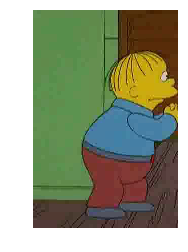

In [5]:
def show_train_image(character_directory, idx):
    directory = os.path.join(train_root_path, character_directory)
    sample_file = get_images_from_directory(directory)[idx]
    path_file = os.path.join(directory, sample_file)
    sample_image = imread(path_file)

    print("Label:{}, Image:{}, Shape:{}".format(character_directory, idx, sample_image.shape))
    plt.imshow(sample_image)
    plt.axis('off')
    plt.show()
    
idx = random.randint(0, 10)
show_train_image(character_directories[idx], idx)

Label:marge_simpson, Image:384, Shape:(171, 114, 3)


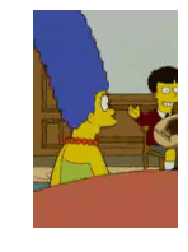

In [6]:
def show_test_image(idx):
    sample_file, sample_name = test_image_names[idx], test_image_names[idx].split('_')[:-1]
    path_file = os.path.join(test_root_path, sample_file)
    sample_image = imread(path_file)

    print("Label:{}, Image:{}, Shape:{}".format('_'.join(sample_name), idx, sample_image.shape))
    plt.imshow(sample_image)
    plt.axis('off')
    plt.show()

idx = random.randint(0, len(test_image_names))
show_test_image(idx)

### Training Images

In [44]:
#Obtain the characters Serie with the most number of images
characters = info.sort_values(by='total', ascending=False).name

#transform to list with the following format:  Homer Simpson -> homer_simpson
characters = characters.map(lambda x: x.replace(" ", "_").lower()).tolist()

#create the complete list of paths to the image files
max_chars = 20

image_files = list()
for i in range(0, 20):
    directory = os.path.join(train_root_path, characters[i])
    image_files += list(map(lambda x: os.path.join(directory, x), get_images_from_directory(directory)))

In [53]:
from random import shuffle
shuffle(image_files)

#shuffle the list
image_files[0:5]

['./the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_0610.jpg',
 './the-simpsons-characters-dataset/simpsons_dataset/comic_book_guy/pic_0143.jpg',
 './the-simpsons-characters-dataset/simpsons_dataset/moe_szyslak/pic_0317.jpg',
 './the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_0178.jpg',
 './the-simpsons-characters-dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0539.jpg']

In [54]:
len(image_files)

19548

In [57]:
#Create the batch generator
def trainig_images_batch_generator(batch_size):
    #yield
    pass

## Keras + SPP Module

Keras doesn't support currently the SSP layer but thanks to [yhenon](https://github.com/yhenon) there's a module which is integrated into keras. [Code is here](https://github.com/yhenon/keras-spp)